In [1]:
import matplotlib.pyplot as plt

from superfv import AdvectionSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis
import numpy as np

In [2]:
N = 64
p = 3

sim = AdvectionSolver(
    ic=lambda array_slicer, x, y, z, t, xp: ic.square(
        array_slicer, x, y, z, vy=1, xp=xp
    ),
    ny=N,
    p=p,
    MOOD=True,
    cascade="first-order",
    max_MOOD_iters=10,
    PAD={"rho": (0, 1)},
    PAD_atol=1e-14,
)

In [3]:
sim.run(1.0, q_max=2)

Step #81 @ t=1.00e+00 | dt=1.55e-15 | (done)                                                        


In [4]:
np.min(sim.minisnapshots["min_rho"]), np.max(sim.minisnapshots["max_rho"])

(np.float64(0.0), np.float64(1.0000000000000002))

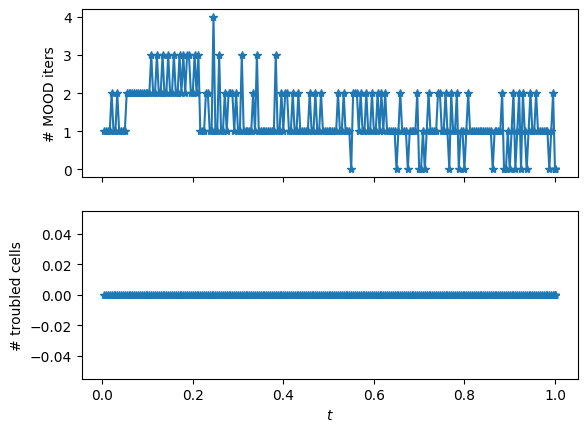

In [5]:
fig, axs = plt.subplots(2, 1, sharex=True)

axs[1].set_xlabel(r"$t$")
axs[0].set_ylabel("# MOOD iters")
axs[1].set_ylabel("# troubled cells")

vis.plot_timeseries(sim, axs[0], "nfine_MOOD_iters", label="first-order", marker="*")

vis.plot_timeseries(
    sim, axs[1], "nfine_troubled_cells", label="first-order", marker="*"
)

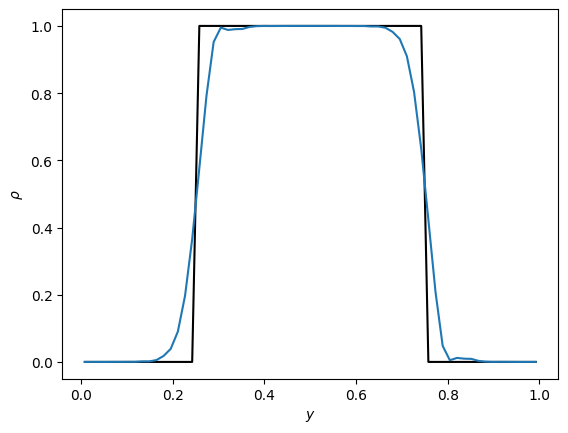

In [6]:
fig, ax = plt.subplots(1, 1)
ax.set_ylabel(r"$\rho$")
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, t=0, color="k")
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, xlabel=True, trouble_marker="*")